# Exploratory Data Analysis on Unicorn Companies #


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [37]:
data = pd.read_csv("..\Unicorn_Companies_Dataset.csv")

In [38]:
data.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/2017,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/2012,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/2014,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/2018,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/2019,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/2014,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/2017,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/2019,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [39]:
data.size

10740

In [40]:
data.shape

(1074, 10)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [42]:
data.describe(include='all')

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
count,1074,1074,1074,1074,1058,1074,1074,1074.000000,1074,1073
unique,1073,30,639,16,256,46,6,NaN,539,1058
top,Bolt,$1B,7/13/2021,Fintech,San Francisco,United States,North America,NaN,$1B,Sequoia Capital
freq,2,471,9,224,152,562,589,NaN,60,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.895717,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.698573,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1919.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN


In [43]:
data.isnull().any(axis=0)

Company             False
Valuation           False
Date Joined         False
Industry            False
City                 True
Country/Region      False
Continent           False
Year Founded        False
Funding             False
Select Investors     True
dtype: bool

In [44]:
data.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [45]:
mask = data['City'].isnull()
data[mask]['Country/Region'].value_counts()

Singapore    12
Hong Kong     3
Bahamas       1
Name: Country/Region, dtype: int64

In [46]:
data.drop_duplicates().shape

(1074, 10)

In [47]:
data = data.dropna()
data.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/2017,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/2012,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/2014,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [48]:
data.isna().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country/Region      0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

In [49]:
data.sort_values(by='Year Founded', ascending=False).head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
714,Yidian Zixun,$1B,10/17/2017,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund"
952,LayerZero Labs,$1B,3/30/2022,Internet software & services,New York,United States,North America,2021,$143M,"Andreessen Horowitz, FTX Ventures, Tiger Globa..."
554,ClickHouse,$2B,10/28/2021,Data management & analytics,Portola Valley,United States,North America,2021,$300M,"Lightspeed Venture Partners, Almaz Capital Par..."
782,Phantom,$1B,1/31/2022,Fintech,San Francisco,United States,North America,2021,$118M,"Paradigm, Andreessen Horowitz, Jump Capital"
775,Jokr,$1B,12/2/2021,E-commerce & direct-to-consumer,New York,United States,North America,2021,$430M,"GGV Capital, Tiger Global Management, Greycroft"
864,Aptos,$1B,3/15/2022,Internet software & services,Palo Alto,United States,North America,2021,$200M,"Andreessen Horowitz, Coinbase Ventures, Tiger ..."
967,Mensa Brands,$1B,11/16/2021,Other,Bengaluru,India,Asia,2021,$218M,"Accel, Falcon Edge Capital, Norwest Venture Pa..."
822,GlobalBees,$1B,12/28/2021,E-commerce & direct-to-consumer,New Delhi,India,Asia,2021,$185M,"Chiratae Ventures, SoftBank Group, Trifecta Ca..."
314,Flink Food,$3B,12/1/2021,E-commerce & direct-to-consumer,Berlin,Germany,Europe,2021,$1B,"Mubadala Capital, Bond, Prosus Ventures"
396,candy.com,$2B,10/21/2021,Fintech,New York,United States,North America,2021,$100M,"Insight Partners, Softbank Group, Connect Vent..."


In [50]:
data['Year Founded'].value_counts().sort_values(ascending=False)

2015    151
2016    109
2014    107
2012     94
2013     85
2011     81
2017     74
2018     59
2019     44
2010     39
2009     34
2008     27
2020     24
2007     23
2006     15
2005     14
2000     11
2021     11
2001      9
1999      8
2003      8
2004      8
1998      5
2002      4
1995      2
1994      2
1996      1
1919      1
1979      1
1992      1
1991      1
1990      1
1984      1
1993      1
1997      1
Name: Year Founded, dtype: int64

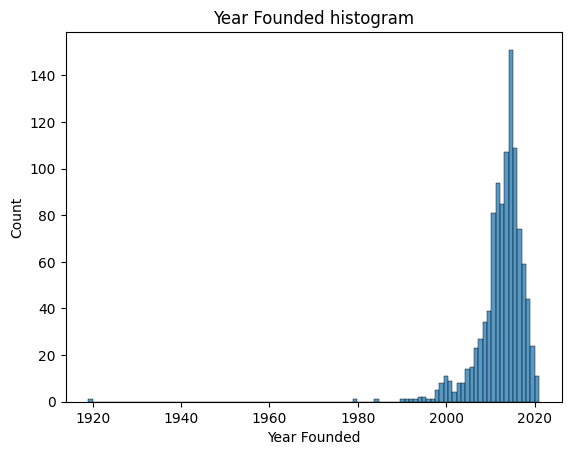

In [51]:
sns.histplot(data=data, x='Year Founded')
plt.title('Year Founded histogram')
plt.show()

In [52]:
data['Date Joined'] = pd.to_datetime(data['Date Joined'])
data.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

In [53]:
data['Month Joined'] = data['Date Joined'].dt.month_name()
data.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December


In [54]:
data['Years To Join'] = data['Date Joined'].dt.year - data['Year Founded']
data.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December,6


In [55]:
data_2021 = data[data["Date Joined"].dt.year == 2021]
data_2021.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
16,J&T Express,$20B,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",April,6
24,Blockchain.com,$14B,2021-02-17,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",February,10
27,OpenSea,$13B,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",July,4
34,Getir,$12B,2021-03-26,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,$2B,"Tiger Global Management, Sequoia Capital, Revo...",March,6
37,GoodLeap,$12B,2021-10-13,Internet software & services,Roseville,United States,North America,2003,$800M,"New Enterprise Associates, BDT Capital Partner...",October,18


In [56]:
data_2021.insert(3,'Week Joined',data['Date Joined'].dt.strftime('%Y-W%V'))

In [57]:
data_2021.head()

,Company,Valuation,Date Joined,Week Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
16,J&T Express,$20B,2021-04-07,2021-W14,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",April,6
24,Blockchain.com,$14B,2021-02-17,2021-W07,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",February,10
27,OpenSea,$13B,2021-07-20,2021-W29,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",July,4
34,Getir,$12B,2021-03-26,2021-W12,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,$2B,"Tiger Global Management, Sequoia Capital, Revo...",March,6
37,GoodLeap,$12B,2021-10-13,2021-W41,Internet software & services,Roseville,United States,North America,2003,$800M,"New Enterprise Associates, BDT Capital Partner...",October,18


In [58]:
data_by_week_2021 = data_2021.groupby('Week Joined')['Company'].count().reset_index().rename(columns={'Company':'Company Count'})
data_by_week_2021.head()

,Week Joined,Company Count
0,2021-W01,12
1,2021-W02,9
2,2021-W03,5
3,2021-W04,8
4,2021-W05,4


In [59]:
data_2020 = data[data["Date Joined"].dt.year == 2020]
data_2020.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
22,Genki Forest,$15B,2020-03-01,Consumer & retail,Beijing,China,Asia,2016,$721M,"Sequoia Capital China, Longfor Capitalm, Gaoro...",March,4
23,goPuff,$15B,2020-10-08,E-commerce & direct-to-consumer,Philadelphia,United States,North America,2013,$3B,"Accel, Softbank Group, Anthos Capital",October,7
38,Xingsheng Selected,$12B,2020-07-22,E-commerce & direct-to-consumer,Changsha,China,Asia,2009,$5B,"KKR, Tencent Holdings, Sequoia Capital China",July,11
54,Figma,$10B,2020-04-30,Internet software & services,San Francisco,United States,North America,2012,$333M,"Index Ventures, Greylock Partners, Kleiner Per...",April,8
57,Notion Labs,$10B,2020-04-01,Internet software & services,San Francisco,United States,North America,2016,$343M,"Index Ventures, Draft Ventures, Felicis Ventures",April,4


In [60]:
data_2020_2021 = pd.concat([data_2020, data_2021.drop('Week Joined',axis=1)])
data_2020_2021.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
22,Genki Forest,$15B,2020-03-01,Consumer & retail,Beijing,China,Asia,2016,$721M,"Sequoia Capital China, Longfor Capitalm, Gaoro...",March,4
23,goPuff,$15B,2020-10-08,E-commerce & direct-to-consumer,Philadelphia,United States,North America,2013,$3B,"Accel, Softbank Group, Anthos Capital",October,7
38,Xingsheng Selected,$12B,2020-07-22,E-commerce & direct-to-consumer,Changsha,China,Asia,2009,$5B,"KKR, Tencent Holdings, Sequoia Capital China",July,11
54,Figma,$10B,2020-04-30,Internet software & services,San Francisco,United States,North America,2012,$333M,"Index Ventures, Greylock Partners, Kleiner Per...",April,8
57,Notion Labs,$10B,2020-04-01,Internet software & services,San Francisco,United States,North America,2016,$343M,"Index Ventures, Draft Ventures, Felicis Ventures",April,4


In [61]:
data_2020_2021['Quarter Joined'] = data_2020_2021['Date Joined'].dt.to_period('Q').dt.strftime('%Y-Q%q')
data_2020_2021.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join,Quarter Joined
22,Genki Forest,$15B,2020-03-01,Consumer & retail,Beijing,China,Asia,2016,$721M,"Sequoia Capital China, Longfor Capitalm, Gaoro...",March,4,2020-Q1
23,goPuff,$15B,2020-10-08,E-commerce & direct-to-consumer,Philadelphia,United States,North America,2013,$3B,"Accel, Softbank Group, Anthos Capital",October,7,2020-Q4
38,Xingsheng Selected,$12B,2020-07-22,E-commerce & direct-to-consumer,Changsha,China,Asia,2009,$5B,"KKR, Tencent Holdings, Sequoia Capital China",July,11,2020-Q3
54,Figma,$10B,2020-04-30,Internet software & services,San Francisco,United States,North America,2012,$333M,"Index Ventures, Greylock Partners, Kleiner Per...",April,8,2020-Q2
57,Notion Labs,$10B,2020-04-01,Internet software & services,San Francisco,United States,North America,2016,$343M,"Index Ventures, Draft Ventures, Felicis Ventures",April,4,2020-Q2


In [67]:
#data_2020_2021['Valuation'] = 
data_2020_2021['Valuation'] = data_2020_2021['Valuation'].str.strip('$B')
data_2020_2021['Valuation'] = data_2020_2021['Valuation'].astype(float)

In [69]:
data_2020_2021.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join,Quarter Joined
22,Genki Forest,15.0,2020-03-01,Consumer & retail,Beijing,China,Asia,2016,$721M,"Sequoia Capital China, Longfor Capitalm, Gaoro...",March,4,2020-Q1
23,goPuff,15.0,2020-10-08,E-commerce & direct-to-consumer,Philadelphia,United States,North America,2013,$3B,"Accel, Softbank Group, Anthos Capital",October,7,2020-Q4
38,Xingsheng Selected,12.0,2020-07-22,E-commerce & direct-to-consumer,Changsha,China,Asia,2009,$5B,"KKR, Tencent Holdings, Sequoia Capital China",July,11,2020-Q3
54,Figma,10.0,2020-04-30,Internet software & services,San Francisco,United States,North America,2012,$333M,"Index Ventures, Greylock Partners, Kleiner Per...",April,8,2020-Q2
57,Notion Labs,10.0,2020-04-01,Internet software & services,San Francisco,United States,North America,2016,$343M,"Index Ventures, Draft Ventures, Felicis Ventures",April,4,2020-Q2


In [76]:
data_by_quarter_2020_2021 = data_2020_2021.groupby('Quarter Joined')['Valuation'].mean().reset_index().rename(columns={'Valuation':'Avg. Valuation'})
data_by_quarter_2020_2021.head()

,Quarter Joined,Avg. Valuation
0,2020-Q1,3.444444
1,2020-Q2,3.764706
2,2020-Q3,3.896552
3,2020-Q4,3.697674
4,2021-Q1,2.766355


In [78]:
data_by_quarter_2020_2021['Quarter Number'] = data_by_quarter_2020_2021['Quarter Joined'].str[-2:]
data_by_quarter_2020_2021['Year Joined'] = data_by_quarter_2020_2021['Quarter Joined'].str[:4]
data_by_quarter_2020_2021.head()

,Quarter Joined,Avg. Valuation,Quarter Number,Year Joined
0,2020-Q1,3.444444,Q1,2020
1,2020-Q2,3.764706,Q2,2020
2,2020-Q3,3.896552,Q3,2020
3,2020-Q4,3.697674,Q4,2020
4,2021-Q1,2.766355,Q1,2021


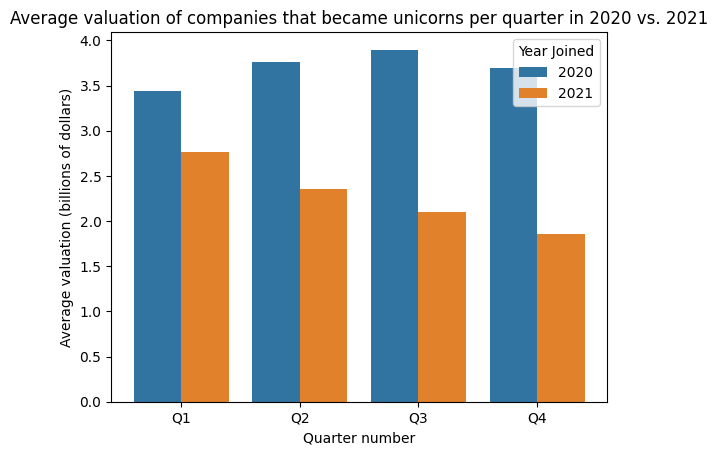

In [81]:
sns.barplot(x=data_by_quarter_2020_2021['Quarter Number'],
            y=data_by_quarter_2020_2021['Avg. Valuation'],
            hue=data_by_quarter_2020_2021['Year Joined']
           )
plt.plot()
plt.xlabel("Quarter number")
plt.ylabel("Average valuation (billions of dollars)")
plt.title("Average valuation of companies that became unicorns per quarter in 2020 vs. 2021")

plt.show()